<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 6: Systems of linear equations

In this Notebook, we learn how to build and solve systems of linear equations, and apply these techniques to solve practical problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Building and solving a system of linear equations
A parabola is defined by three points (provided they are not on a straight line). 
The equation for a parabola is $y=ax^2+bx+c$, where $a$, $b$, and $c$ are constants.
Given three points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, the following system of three linear equations may be compiled

$$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$$

Or in matrix form

$$
\left(
\begin{array}{ccc}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
a \\b \\c \\
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}
\right)
$$

To solve this problem, we build a two-dimensional array containing the matrix (called `A`) and a one-dimensional array containing the right-hand side (called `rhs`).
Let's do that for the three points $(x_1,y_1)=(-2,2)$, $(x_2,y_2)=(1,-1)$, $(x_3,y_3)=(4,4)$

In [2]:
xp = np.array([-2, 1, 4])
yp = np.array([2, -1, 4])
A = np.zeros((3, 3))
rhs = np.zeros(3)
for i in range(3):
    A[i] = xp[i] ** 2, xp[i], 1  # Store one row at a time
    rhs[i] = yp[i]
print('Array A:')
print(A)
print('rhs:',rhs)

Array A:
[[ 4. -2.  1.]
 [ 1.  1.  1.]
 [16.  4.  1.]]
rhs: [ 2. -1.  4.]


The system may be solved with the `solve` method, which is part of the `linalg` subpackage of `numpy`. The `solve` method takes as input a two-dimensional array (the matrix) and a one-dimensional array (the right-hand side) and returns the solution. To check whether the solution is correct, we need to do a matrix multiply of the matrix stored in the array `A` and the obtained solution, which we call `sol`. As we learned the line

`A * sol`

does a term-by-term multiply. For a matrix multiply, the `@` symbol needs to be used (alternatively, the `np.dot` function can be used; the `@` symbol does not work in Python 2).

In [3]:
sol = np.linalg.solve(A, rhs)
print('solution is:', sol)
print('specified values of y:', yp)
print('A @ sol:', A @ sol)

solution is: [ 0.44444444 -0.55555556 -0.88888889]
specified values of y: [ 2 -1  4]
A @ sol: [ 2. -1.  4.]


We can also visually check whether we solved the problem correctly by drawing the three points and the parabola. 

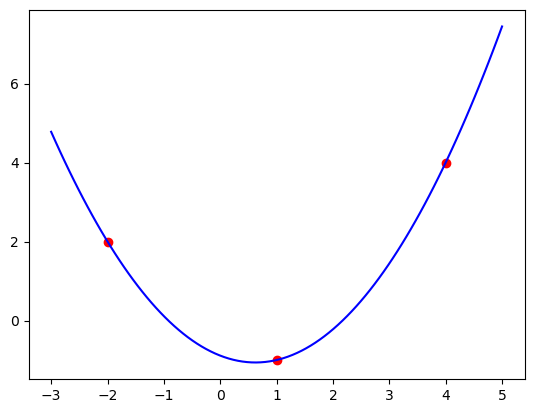

In [4]:
plt.plot(xp, yp, 'ro')
x = np.linspace(-3, 5, 100)
y = sol[0] * x ** 2 + sol[1] * x + sol[2]
plt.plot(x, y, 'b');

### Exercise 1. <a name="back1"></a>Fitting a wave
Consider the following four measurements of the quantity $y$ at time $t$: $(t_0,y_0)=(0,3)$, $(t_1,y_1)=(0.25,1)$, $(t_2,y_2)=(0.5,-3)$, $(t_3,y_3)=(0.75,1)$. The measurements are part of a wave that may be written as

$y = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

where $a$, $b$, $c$, and $d$ are parameters. Build a system of four linear equations and solve for the four parameters. Creates a plot of the wave for $t$ going from 0 to 1 and show the four measurements with dots.

<a href="#ex1answer">Answers to Exercise 1</a>

### Fitting an arbitrary polynomial
In the next three exerises, we are going to fit a polynomial of arbitary degree $N$ to a set of $N+1$ data points. The function we are going to fit is 

$$f(x) = a_0 + a_1x + a_2x^2 + ... + a_Nx^N = \sum\limits_{n=0}^{N}a_nx^n$$

Note that there are $N+1$ parameters $a_n$, while the degree of the polynomial is called $N$.

### Exercise 2. <a name="back2"></a>The `fpoly` function
First, write a function called `fpoly` that returns an array where item $n$ is equal to $x^n$. The input arguments of the function are the value of $x$ and the degree of the polynomial $N$. The output of the function is an array of length $N+1$. Test your function for $x=2$ and $N=4$ by executing

`print fpoly(2, 4)`

which should return `[  1.   2.   4.   8.  16.]`.

<a href="#ex2answer">Answers to Exercise 2</a>

### Exercise 3. <a name="back3"></a>The `solvepoly` function
Next, write a function that computes the parameters $a_n$ to fit a polynomial of degree $N$ through $N+1$ data points. Call the function `solvepoly`. The input arguments of the function are an array $x$ of length $N+1$ and an array $y$ of length $N+1$. The output is an array of parameters $a_n$ such that a polynomial of degree $N$ goes exactly through the $N+1$ data points $x$ and $y$. Inside the function, you need to compute a matrix of $N+1$ equations for the $N+1$ unknown parameters. For each of the rows of the matrix, call the function `fpoly`. Test your function by executing the following four commands. If your code is correct, the parameter array `a` is [ 3.          2.33333333 -6.          1.66666667].

    xp = np.array([0, 1, 2, 3])
    yp = np.array([3, 1, -3, 1])
    a = solvepoly(xp, yp)
    print(a)

<a href="#ex3answer">Answers to Exercise 3</a>

### Exercise 4.  <a name="back3"></a>The `fpolyeval` function
Finally, write a function called `fpolyeval` to evaluate the function $f(x) = \sum\limits_{n=0}^{N}a_nx^n$ for given parameters $a$ and an array of $x$ values. The `fpolyeval` function takes as input argument an array of arbitrary length $x$ and an array of parameters $a$ of length $N+1$. The function returns an array of $f(x)$ values with a length equal to the length of $x$. First test your function by executing

`fpolyeval(xp, a)`

where `xp` is the array with the values entered in Exercise 3 and `a` are the parameters computed in Exercise 3. When you programmed everything correctly, the function should return the four values of `yp` specified in Exercise 3. Test your function further by running the following commands, which should plot the four data points of Exercise 3 as markers and the 3$^\text{rd}$ degree polynomial that goes exactly through the four points.

    x = np.linspace(-1,4,100)
    y = fpolyeval(x, a)
    plt.plot(xp, yp, 'ko', label='data')
    plt.plot(x, y, label='fitted poly')
    plt.legend(loc='best');

<a href="#ex4answer">Answers to Exercise 4</a>

### One-dimensional groundwater flow
Consider a sand layer covered by a clay layer. The sand layer is bounded on each side by a canal with fixed water level $h_1^*$ (left) and $h_2^*$ (right); the distance between the two canals is $L$. Water leaks through the clay layer at a constant rate $P$ (see Figure). The groundwater head in the sand layer is governed by the second-order ordinary differential equation

$$\frac{\text{d}^2h}{\text{d}x^2} = -\frac{P}{kD}$$

where $h$ is the head, $k$ is the hydraulic conductivity of the sand layer, and $D$ is the thickness of the sand layer. The boundary conditions are that $h=h_1^*$ at $x=0$ and $h=h_2^*$ at $x=L$. 

<img src="http://i.imgur.com/2DH0sxT.png" alt="Consolidation" width=400pt>

Although it is easy to solve this problem exactly, we will solve it here numerically using the finite difference method (which allows for $P$ to be a function of $x$, for example). The head is computed at $N+1$ equally spaced points from $x=0$ to $x=L$. The points are labeled $x_0$ through $x_{N}$, where $x_n=n\Delta x$, and $\Delta x$ is the horizontal distance between the points. The head at point $x_n$ is called $h_n$. The second order derivative can be approximated as (see, e.g., Verrujt (2012) Soil Mechanics, Eq. 17.4; a link to a pdf of the full text of this book may be found under Software [here](http://geo.verruijt.net/).

$$\frac{\text{d}^2h}{\text{d}x^2} \approx \frac{1}{\Delta x} \left[ \frac{h_{n+1}-h_n}{\Delta x} - \frac{h_{n}-h_{n-1}}{\Delta x} \right]= \frac{h_{n-1}-2h_n+h_{n+1}}{(\Delta x)^2}$$

Substitution of this approximation of the derivative in the differential equation and rearranging terms gives

$$h_{n-1}-2h_n+h_{n+1} = -P\frac{(\Delta x)^2}{kD}$$

An equation like this may be written for every point $n$, except for the first and last point where we need to apply the boundary conditions:

$$h_0=h_1^* \qquad h_N=h_2^*$$

When $N=4$, we need to solve a system of $N+1=5$ linear equations in the unknowns $h_0$ through $h_4$:

$$\begin{split}
h_0 &= h_1^*  \\
h_{0}-2h_1+h_{2} &= -P(\Delta x)^2/(kD) \\
h_{1}-2h_2+h_{3} &= -P(\Delta x)^2/(kD) \\
h_{2}-2h_3+h_{4} &= -P(\Delta x)^2/(kD) \\
h_4 &= h_2^* 
\end{split}$$

or in matrix form

$$
\left(
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
h_0 \\
h_1 \\
h_2 \\
h_3 \\
h_4 \\
\end{array}
\right)
=
\left(
\begin{array}{c}
h_1^* \\
-P(\Delta x)^2/(kD) \\
-P(\Delta x)^2/(kD) \\
-P(\Delta x)^2/(kD) \\
h_2^* \\
\end{array}
\right)
$$

Note that the matrix consists of mostly zeros. The matrix is referred to as a tri-diagonal matrix, as there are only values along three diagonals of the matrix. The matrix may be constructed by specifying the values and positions of the diagonals. The main diagonal has position number zero and has length $N+1$. The diagonal right above the main diagonal has position number $+1$ and length $N$, while the diagonal below the main diagonal has position number $-1$ and also length $N$. The `np.diag` function creates a matrix consisting of one diagonal. The input arguments are an array of the correct length with the values along the diagonal and the position of the diagonal. The matrix may be constructed as follows:

In [5]:
N = 4
d0 = -2 * np.ones(N + 1)  # main diagonal
d0[0] = 1  # first value of main diagonal is 1
d0[-1] = 1 # last value of main diagonal is 1
dplus1 = np.ones(N) # diagonal right above main diagonal, position 1
dplus1[0] = 0    # first value of diagonal is 0
dmin1 = np.ones(N)  # diagonal right below main diagonal, position -1
dmin1[-1] = 0    # last value of diagonal is 0
A = np.diag(d0, 0) + np.diag(dplus1, 1) + np.diag(dmin1, -1)
print(A)

[[ 1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1.]]


Note that the finite-difference method described above is accurate when you use a reasonable number of points. Four points won't cut it. You may figure out whether you used enough points by, for example, doubling the number of points and compare the two solutions. 

### Exercise 5. <a name="back5"></a>The head between two canals
Compute the head distribution in a sand layer bounded on each side by a canal. Given: $k=10$ m/day, $D=10$ m, $h_1^*=20$ m, $h_2^*=22$ m, $L=1000$ m, $P=0.001$ m/d. Use $N=40$. Write Python code to:

* Solve for the heads in all $N+1$ points
* Print the maximum value of the head between the two canals to the screen (this should be around 22.5)
* Create a plot of the head vs. $x$. Label the axes.

<a href="#ex5answer">Answers to Exercise 5</a>

### Consolidation
The deformation of saturated clay soils is a slow process, referred to as consolidation. In the compression of a soil, the porosity decreases, and as a result there is less space available for pore water. Hence, some pore water needs to be pushed out of the soil during compression. This may take considerable time in clays, as the permeability of clays is small. An extensive description of the consolidation process may be found in, e.g., Chapters 15-17 of Verruijt, 2012, Soil Mechanics, see this [link](http://geo.verruijt.net/).

Consider one-dimensional consolidation in a soil of height $h$. The water pressure $p$ in the soil sample is governed by the differential equation

$$\frac{\partial p}{\partial t} = c_v \frac{\partial^2 p}{\partial z^2}$$

where $z$ is the vertical coordinate (positive upward), and $c_v$ is the consolidation coefficient.  We consider the problem where water can drain out at the top, but not at the bottom, so that the boundary condition at the bottom is

$$z=0 \qquad \frac{\partial p}{\partial z} = 0$$

and the boundary condition at the top is

$$z=h \qquad p = 0$$

A constant load is applied at the top at time $t=0$ resulting, initially, in a uniform pressure $q$ throughout the soil sample (except for at $z=0$, where the pressure is always zero).

$$t=0 \qquad p = q$$

<img src="http://i.imgur.com/4xdeoxw.png" alt="Consolidation" width=400pt>

The change of pressure with time in the soil is simulated with a numerical method (fully implicit finite differences, to be exact). The pressure is computed at $N+1$ points, equally distributed from $z=0$ to $z=h$. The points are labeled $z_0$ through $z_{N}$, where $z_n=n\Delta z$ and $\Delta z$ is the vertical distance between the points. The pressure at point $z_n$ is called $p_n$. A separate solution is computed for every time step $\Delta t$. The time derivative is approximated as

$$\frac{\partial p}{\partial t} \approx \frac{p_n(t) - p_n(t-\Delta t)}{\Delta t}$$

while the spatial derivative is approximated as

$$\frac{\partial^2 p}{\partial z^2} \approx \frac{p_{n-1}(t) -2p_n(t) + p_{n+1}(t)}{\Delta z)^2} $$

Subsitution of the approximations of these derivatives and gathering terms gives the following equation:

$$p_{n-1}(t) - (2+\mu)p_n(t) + p_{n+1}(t) = -\mu p_n(t-\Delta t)$$

where 

$$\mu = (\Delta z)^2/(c_v\Delta t)$$

This is an equation for the pressure in points $(n-1)$, $n$, and $(n+1)$ at time $t$, where it is assumed that the pressure at time $t-\Delta t$ is known.

The equations for $n=0$ and $n=N$ are different. 
At the bottom of the sample ($n=0$) the boundary condition is $\partial p/\partial z = 0$. The derivative may be approximated at $z_0=0$ as 

$$\left(\frac{\partial p}{\partial z}\right)_{z=0} \approx (p_1-p_{-1})/(2\Delta z)=0$$

where $p_{-1}$ is the pressure at an imaginary point $\Delta z$ below $z_0$. The derivative is zero when $p_{-1}=p_1$, and substitution in the equation for $n=0$ gives

$$- (2+\mu)p_n(t) + 2p_{n+1}(t) = -\mu p_n(t-\Delta t)$$

The equation for $n=N$ is easier, as at the top of the sample ($n=N$) the pressure is fixed to $p_N=0$.

As an example, the system of equations for $N=4$ is

$$
\left(
\begin{array}{ccccc}
-(2+\mu) & 2 & 0 & 0 & 0 \\
1 & -(2+\mu) & 1 & 0 & 0 \\
0 & 1 & -(2+\mu) & 1 & 0 \\
0 & 0 & 1 & -(2+\mu) & 1 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
p_0(t) \\
p_1(t) \\
p_2(t) \\
p_3(t) \\
p_4(t) \\
\end{array}
\right)
=
\left(
\begin{array}{c}
-\mu p_0(t-\Delta t)) \\
-\mu p_1(t-\Delta t)) \\
-\mu p_2(t-\Delta t)) \\
-\mu p_3(t-\Delta t) \\
0 \\
\end{array}
\right)
$$

A solution is obtained by stepping through time. The matrix needs to be computed only once, as it doesn't change through time. Every time step, a new right-hand-side needs to be computed and a linear system of $N+1$ equations needs to be solved. If the matrix is called $A$ and the right-hand-side (based on the pressures at $t-\Delta t$) is called $\vec{r}(t-\Delta t)$, then the pressure at time $t$, $\vec{p}(t)$, is obtained by solving the system

$$A\vec{p}(t) = \vec{r}(t-\Delta t)$$



Note again that the presented numerical solution procedure is approximate and only gives accurate solutions when the time step $\Delta t$ and the spatial discretization $\Delta z$ are chosen small enough.

### Exercise 6. <a name="back6"></a>One-dimensional consolidation
Consider the consolidation process of a clay layer that is 2 m thick. A uniform load is applied at time $t=0$ causing a unit increase in the pressure, i.e., $p(t=0)=1$. The consolidation coefficient of the clay is $c_v=1\cdot 10^{-6}$ m$^2$/s. Simulate the consolidation process using the numerical method described above. Use $N=40$ and a time step $\Delta t=4\cdot 10^4$ sec. Take 50 time steps and plot the pressure distribution in the clay every 10 time steps. Add labels along the axes and a legend. Compare your solution to the graph in Fig. 16.2 of Veruit (2012) (Note that Verruijt plots $p$ along the horizontal axis). The last line of your plot should approximate the line $c_v t / h^2=0.5$ in the graph of Verrujt. 

Make sure that your Python code:

* Solves for the pressure in all $N+1$ points for all 50 time steps and plots the results after 10, 20, 30, 40, and 50 time steps.
* Prints the maximum value of the pressure to the screen after 10, 20, 30, 40, and 50 time steps.

<a href="#ex6answer">Answers to Exercise 6</a>

### The inverse of a matrix
As mentioned, the values of the matrix `A` don't change through time. Hence, it is more efficient to compute and store the inverse of the matrix rather than repeatedly calling the `np.linalg.solve` method. The inverse of a matrix may be computed with the `inv` function of the `linalg` package. If the inverse of matrix `A` is called `Ainv`, the solution for the pressure may be obtained through matrix multiplication of `Ainv` with the right-hand side. For example, for the first problem in this Notebook, fitting a parabola through three points, the inverse of the matrix can be computed to obtain a solution as follows: 

In [6]:
A = np.array([[ 4, -2, 1],
              [ 1,  1, 1],
              [16,  4, 1]])
rhs = np.array([2,-1, 4])
Ainv = np.linalg.inv(A)
sol = Ainv @ rhs
print('sol:', sol)

sol: [ 0.44444444 -0.55555556 -0.88888889]


### Exercise 7. <a name="back7"></a>One-dimensional consolidation revisited
Modify your solution to Exercise 6 by computing and storing the inverse of the matrix, and compute a solution through multiplication of the inverse of the matrix with the right-hand-side vector

<a href="#ex7answer">Answers to Exercise 7</a>

### Sparse matrices
The prodedure we have used so far to construct the matrix for a finite-difference solution is not very efficient, as a full matrix is created, which consists of mainly zeros. Non-zero values only appear on three diagonals. There are more efficient routines that store what are called *sparse matrices*. In a sparse matrix, only the value and location of non-zero values in a matrix are stored. Functionality for sparse matrices is available in the `scipy.sparse` package. A sparse matrix may be created from diagonals with the `diags` function, which takes a list of arrays for the diagonals and a list of the numbers of the diagonals. For example, the matrix
$$\left(
\begin{array}{cccc}
2 & 3 & 0 & 0 \\
1 & 2 & 3 & 0 \\
0 & 1 & 2 & 3 \\
0 & 0 & 1 & 2 \\
\end{array}
\right)$$
is created as

In [7]:
import scipy.sparse as sp
A = sp.diags([1 * np.ones(3), 
              2 * np.ones(4), 
              3 * np.ones(3)], 
             [-1, 0, 1], format='csc')
print('Sparse matrix A')
print(A) # Gives the way A is stored: row, column, value
print('Full matrix A as an array')
print(A.toarray())  # Returns the equivalent full array

Sparse matrix A
<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 10 stored elements and shape (4, 4)>
  Coords	Values
  (1, 0)	1.0
  (0, 0)	2.0
  (2, 1)	1.0
  (1, 1)	2.0
  (0, 1)	3.0
  (3, 2)	1.0
  (2, 2)	2.0
  (1, 2)	3.0
  (3, 3)	2.0
  (2, 3)	3.0
Full matrix A as an array
[[2. 3. 0. 0.]
 [1. 2. 3. 0.]
 [0. 1. 2. 3.]
 [0. 0. 1. 2.]]


There are many ways to store a sparse matrix. In the code above, the sparse matrix `A` is stored in *compressed sparse column* (specified as `'csc'`). The advantages and disadvantages of this format are given [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html).  `A` is now a sparse matrix object. (Note that the multiplication sign does not do term-by-term multiplication for sparse matrix objects.) The solution to the system of equations $Ax=b$ is obtained with the `spsolve` function of the `scipy.sparse.linalg` module. 

In [8]:
from scipy.sparse.linalg import spsolve
print('type of A:', type(A))
b = np.arange(4)
x = spsolve(A,b)  # x is solution of Ax=b
print('right-hand-side defined as:', b)
print('verify A @ x gives same:', A @ x)

type of A: <class 'scipy.sparse._csc.csc_matrix'>
right-hand-side defined as: [0 1 2 3]
verify A @ x gives same: [0. 1. 2. 3.]


The main advantage of sparse matrices is that you can solve *much* larger problems than with full matrices, as you only store the (few) points that are not zero. The solver `spsolve` also makes use of the sparsity of the matrix and will generally be faster. 

### Exercise 8 <a name="back8"></a> Sparse matrix
Redo Exercise 5 but now use a *sparse* matrix. Obtain a solution for the head using $h_1^*=42$, $h_2^*=40$, and $N=10000$. All other parameters are the same as for Exercise 2. Create a plot of the head between the two canals. **Warning**: When you try to solve the problem with a regular (full) matrix and $N=10000$, you may run out of computer memory or the solve may take a *very* long time, and/or your program may hang. Don't try this, but if you accidentally do this and your Notebook doesn't recover, try to click on 'Kernel' in the menu bar at the top and then on 'Restart'.

<a href="#ex8answer">Answers to Exercise 8</a>

### Solutions to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

a,b,c,d:  [ 1.  2.  1. -1.]


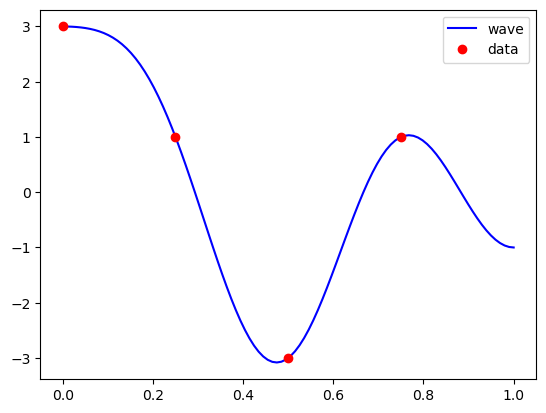

In [9]:
tp = np.array([0, 0.25, 0.5, 0.75])
yp = np.array([ 3, 1, -3, 1])
A = np.zeros((4, 4))
rhs = np.zeros(4)
for i in range(4):
    A[i] = np.cos(1 * np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), \
           np.cos(3 * np.pi * tp[i]), np.cos(4 * np.pi * tp[i])  # Store one row at a time
    rhs[i] = yp[i]
sol = np.linalg.solve(A, rhs)
print('a,b,c,d: ',sol)

t = np.linspace(0, 1, 100)
y = sol[0] * np.cos(1 * np.pi * t) + sol[1] * np.cos(2 * np.pi * t) + \
    sol[2] * np.cos(3 * np.pi * t) + sol[3] * np.cos(4 * np.pi * t)
plt.plot(t, y, 'b', label='wave')
plt.plot(tp, yp, 'ro', label='data')
plt.legend(loc='best');

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

In [10]:
def fpoly(x, N):
    rv = np.zeros(N + 1)
    for n in range(N + 1):
        rv[n] = x ** n
    return rv

print(fpoly(2, 4))

[ 1.  2.  4.  8. 16.]


<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [11]:
def solvepoly(x, y):
    N = len(x) - 1
    mat = np.zeros((N+1, N+1))
    for n in range(N+1):
        mat[n] = fpoly(x[n], N)
    par = np.linalg.solve(mat, y)
    return par
    
xp = np.array([0, 1, 2, 3])
yp = np.array([3, 1, -3, 1])
a = solvepoly(xp, yp)
print(a)

[ 3.          2.33333333 -6.          1.66666667]


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

In [12]:
def fpolyeval(x, a):
    rv = np.zeros(len(x))
    for n in range(len(a)):
        rv += a[n] * x ** n
    return rv

print(fpolyeval(xp, a))

[ 3.  1. -3.  1.]


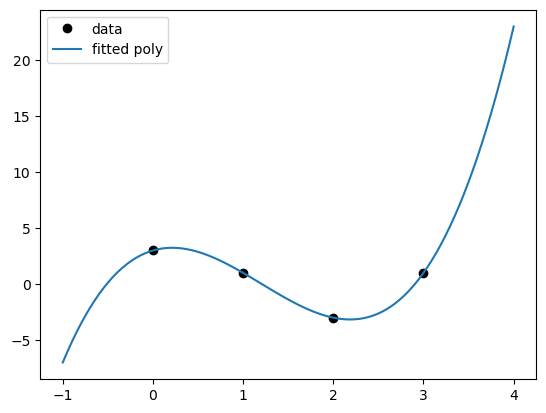

In [13]:
x = np.linspace(-1,4,100)
y = fpolyeval(x, a)
plt.plot(xp, yp, 'ko', label='data')
plt.plot(x, y, label='fitted poly')
plt.legend(loc='best');

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

maximum head  22.449999999999903


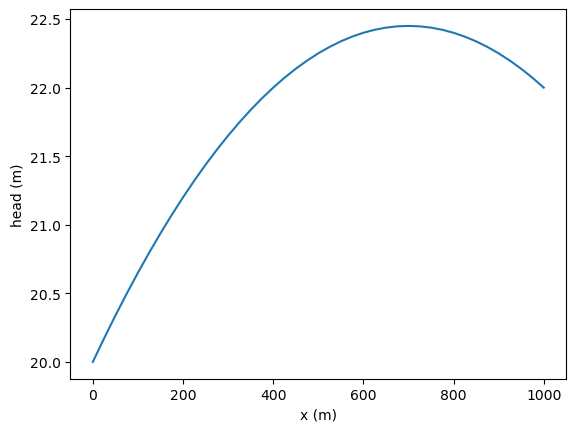

In [14]:
k = 10
D = 10
h1star = 20
h2star = 22
L = 1000
P = 0.001
N = 40

d0 = -2 * np.ones(N + 1)  # main diagonal
d0[0] = 1  # first value of main diagonal is 1
d0[-1] = 1 # last value of main diagonal is 1
dplus1 = np.ones(N) # diagonal right above main diagonal, position 1
dplus1[0] = 0    # first value of diagonal is 0
dmin1 = np.ones(N)  # diagonal right below main diagonal, position -1
dmin1[-1] = 0    # last value of diagonal is 0
A = np.diag(d0, 0) + np.diag(dplus1, 1) + np.diag(dmin1, -1)
# Right hand side
delx = L / N
rhs = -P * delx ** 2 / (k * D) * np.ones(N + 1)
rhs[0] = h1star
rhs[-1] = h2star
# Solve for the head and plot
h = np.linalg.solve(A, rhs)
x = np.linspace(0, L, N + 1)
plt.plot(x, h)
plt.xlabel('x (m)')
plt.ylabel('head (m)')
print('maximum head ', np.max(h))

<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

maximum value after 10 timesteps is: 0.9425826615266134
maximum value after 20 timesteps is: 0.7742325163427506
maximum value after 30 timesteps is: 0.6117657473484334
maximum value after 40 timesteps is: 0.4801227573807983
maximum value after 50 timesteps is: 0.37636878032217186


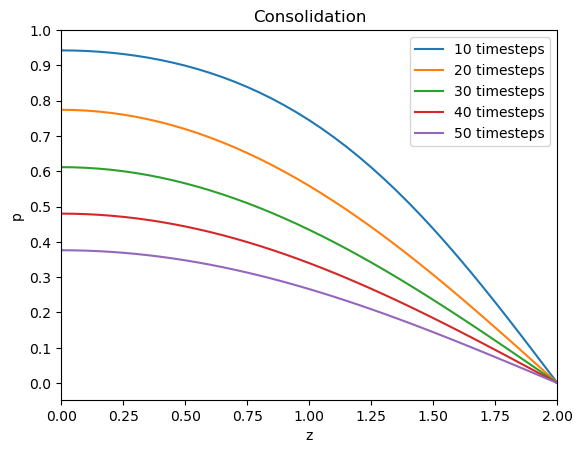

In [15]:
cv = 1e-6  # m^2/s
h = 2  # m
N = 40
delt = 4e4  # seconds
#
delz = h / N
mu = delz ** 2 / (cv * delt)

d0 = -(2 + mu) * np.ones(N + 1)
d0[-1] = 1
dp1 = np.ones(N)
dp1[0] = 2
dm1 = np.ones(N)
dm1[-1] = 0
A = np.diag(d0) + np.diag(dp1, 1) + np.diag(dm1, -1)

p = np.ones(N + 1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = np.linalg.solve(A, rhs)
    plt.plot(np.arange(0, h + 0.01, delz), p, label=str((i + 1) * 10) + ' timesteps')
    print('maximum value after', 10 * ( i + 1), 'timesteps is:', p[0])
plt.xlim(0, 2)
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('p')
plt.yticks(np.linspace(0, 1, 11))
plt.title('Consolidation');

<a href="#back6">Back to Exercise 6</a>

<a name="ex7answer">Answers to Exercise 7</a>

maximum value after 10 timesteps is: 0.9425826615266134
maximum value after 20 timesteps is: 0.7742325163427506
maximum value after 30 timesteps is: 0.6117657473484331
maximum value after 40 timesteps is: 0.48012275738079757
maximum value after 50 timesteps is: 0.3763687803221713


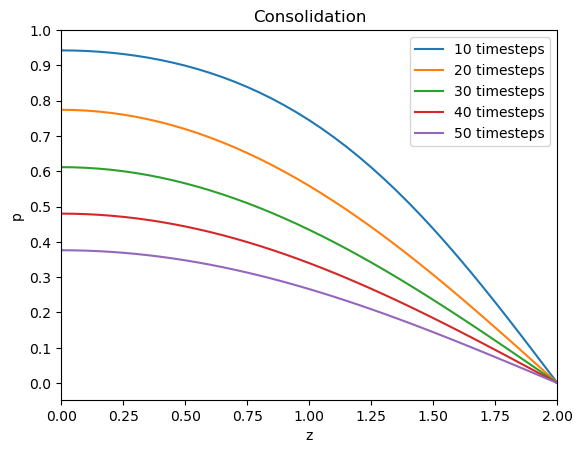

In [16]:
cv = 1e-6  # m^2/s
h = 2  # m
N = 40
delt = 4e4  # seconds
#
delz = h / N
mu = delz ** 2 / (cv * delt)

d0 = -(2 + mu) * np.ones(N + 1)
d0[-1] = 1
dp1 = np.ones(N)
dp1[0] = 2
dm1 = np.ones(N)
dm1[-1] = 0
A = np.diag(d0) + np.diag(dp1, 1) + np.diag(dm1, -1)
Ainv = np.linalg.inv(A)

p = np.ones(N + 1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = Ainv @ rhs
    plt.plot(np.arange(0, h + 0.01, delz), p, label=str((i + 1) * 10) + ' timesteps')
    print('maximum value after', 10 * ( i + 1), 'timesteps is:', p[0])
plt.xlim(0, 2)
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('p')
plt.yticks(np.linspace(0, 1, 11))
plt.title('Consolidation');

<a href="#back7">Back to Exercise 7</a>

<a name="ex8answer">Answers to Exercise 8</a>

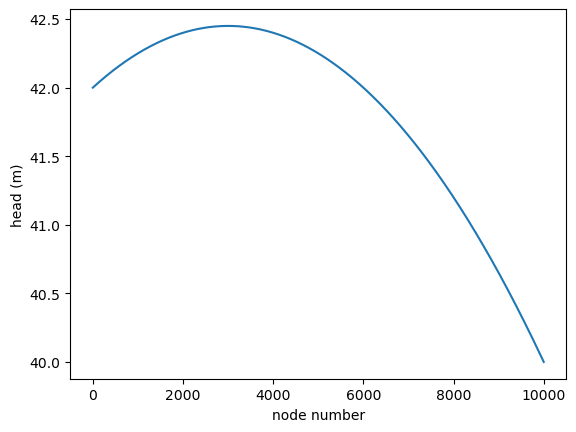

In [17]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve 
k = 10
D = 10
h1star = 42
h2star = 40
L = 1000
P = 0.001
N = 10000
d0 = -2 * np.ones(N + 1)  # main diagonal
d0[0] = 1  # first value of main diagonal is 1
d0[-1] = 1 # last value of main diagonal is 1
dplus1 = np.ones(N) # diagonal right above main diagonal, position 1
dplus1[0] = 0    # first value of diagonal is 0
dmin1 = np.ones(N)  # diagonal right below main diagonal, position -1
dmin1[-1] = 0    # last value of diagonal is 0
A = diags([dmin1, d0, dplus1], [-1, 0, 1], format='csc')
# Right hand side
delx = L / N
rhs = -P * delx ** 2 / (k * D) * np.ones(N + 1)
rhs[0] = h1star
rhs[-1] = h2star
h = spsolve(A, rhs)
plt.plot(h)
plt.xlabel('node number')
plt.ylabel('head (m)');

<a href="#back8">Back to Exercise 8</a>